<a href="https://colab.research.google.com/github/VladGrigoras/CNS/blob/main/CNS_Lab0_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
seaborn.set()

#Introduction

In this lab you will be introduced to differential equations, which are equations involving derivatives of functions. Differential equations arise in many scientific domains, from physics to economics to biology. Differential equations are ubiquitous in computational neuroscience, where they are used to model the dynamics of neurons, networks of neurons, and various other biological processes. You will see them a lot in this course!

The purpose of this lab is twofold. First, we will cover the basics of differential equations, giving you the mathematical and numerical tools required to work with the models you will encounter throughout this course. Second, we will introduce scientific computing in Python through the numpy and matplotlib library, giving you the programming tools to implement and simulate models, analyze data, and generate scientific plots. Mathematical derivations are provided throughout the tutorial - you are encouraged to work through these, but you can skip these if you prefer to proceed to the next section.

Please bear in mind that this lab is different in nature to the other labs in the course, which will all involve the implementation and investigation of models of brain function that we cover in lectures. This lab is designed to ensure that you have the necessary tools and knowledge for the later labs, and for the assessed coursework.

# Ordinary Differential Equations



We start by considering what is perhaps the simplest example of a differential equation. We consider a scalar function $x(t)$ which obeys the following equation:
\begin{aligned}
\frac{dx}{dt} = ax
\end{aligned}

This equation is an example of an ordinary differential equation (ODE - in contrast to partial differential equations, or PDEs). Our goal is to solve the equation to find $x(t)$ (note that the solution is a whole function, i.e. we find $x(t)$ for all of $t$, not just one time point). 


### Analytical Solution: Separation of Variables

We can solve this equation analytically using a method called [method of separation of variables](https://en.wikipedia.org/wiki/Separation_of_variables):

\begin{aligned}
\frac{1}{x}dx &= adt
\\\implies\int \frac{1}{x}dx &= \int adt
\end{aligned}
The equation is now in a form that we know how to solve, and the solution is:
\begin{aligned}
\ln (x)+c_1 &= at + c_2
\\\implies x(t)&=c_3e^{at}
\end{aligned}

The above derivation was an informal one, but this turns out to be the correct solution to the ODE. Most ODEs can't be solved so easily!

Note that the solution obtained above involves an extra parameter $c_3$, and so defines a whole family of solutions to the ODE. Now if we are additionally provided an initial condition, $x(0)=x_0$, we can find a particular solution to the ODE:
\begin{aligned}
x(0)&=x_0=c_3e^{a\cdot 0}
\\ \implies x(t)&=x_0e^{at}
\end{aligned}

With this solution in hand, we can now plot the solution. We plot the solution for $t\in [0,1]$, $x_0=1$ and various values of $a$. The code below shows how to plot these solutions using matlotlib (imported here as plt). Try varying the initial condition $x_0$ and see how the solutions change.


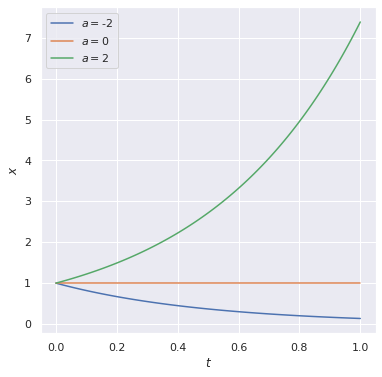

In [ ]:
plt.figure(figsize=(6,6))

#arange(a,b,h) returns a numpy array a, a+h, ... up to b excluded (hence the +0.01)
t = np.arange(0,1+0.01,0.01)
a_s = [-2,0,2]

for a in a_s:
  x = 1*np.exp(a*t)
  plt.plot(t, x, label='$a=$'+str(a))

plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.show()

# Numerical Solution: Time Discretization

Consider the more general class of ODEs $\frac{dx}{dt} = f(x)$ for some continuous function $f$. Many such differential equations do not have *analytic* solutions such as the one above. However, a *numerical* solution can still be obtained. There are many numerical methods for solving ODEs. Here, we consider the simplest one, called the Euler method. Intuitively, the idea behind this method is to write $dx = f(x) dt$, and iteratively update the equation via $x(t+dt) = x(t) + f(x) dt$. We make this idea more formal below.  

## The Euler Method

Euler’s method is the most elementary approximation technique for solving initial-value problems (IVPs) such as the one solved above via separation of variables. In IVPs, we are given an initial condition $x(0)$ and an ODE describing the evolution through time. To solve the ODE over some time interval $t\in[0, T]$, we divide the time interval into a discrete set of evaluation time points of spacing $h$, i.e. $t_i=ih$, with $i = 1, 2,..., N$, and $Nh=T$. The spacing $h$ is called the timestep, sometimes written as $\delta t$, $\Delta t$, or $dt$. 

To better understand how this method works, we perform a Taylor expansion:

\begin{aligned}
x(t_i+\delta t)&= x(t_i)+ \frac{dx}{dt}\bigg \rvert_{t=t_i} \delta t +O(\delta t^2)
\end{aligned}

setting $\frac{dx}{dt}\bigg \rvert_{t=t_i}=f(t_i)$ and $\delta t = h$ gives:

\begin{aligned}
x(t_{i+1}) = x(t_i)+hf(x(t_i)) +O(h^2)
\end{aligned}

Thus, for sufficiently small $h$ we have $x(t_{i+1}) \approx x(t_i) + h f(x(t_i))$. Starting from an initial condition $x(0)$, this allows us to numerically estimate the values of the solution to the IVP on the evaluation points $\{0,t_1,..., T\}$. The Euler method is not exact, but its accuracy increases as $h$ is decreased. This sets a tradeoff with the Euler method - smaller step sizes increase numerical precision, but increase computation time.


## Exercise 1.1 $-$ Euler Solver
Code a Euler numerical solver. The template of the solver is already given bellow, do not alter it. 

To make this method more general, you can allow 1) the step size to vary, i.e. $h_i = t_{i+1}-t_i$,  2) $f$ take time as an argument, so that $\frac{dx}{dt} = f(t,x)$, and 3) $\mathbf{x}(t)$ be an N-dimensional vector rather than a scalar.

In [ ]:
def euler(f, x0, t):
  """
  in:
  f: python function which takes a N dimensional ndarray and returns an N dimensional ndarray
  x0: N dimensional ndarray
  t: T dimensional ndarray such that ts[i]>0 and ts[i+1]>ts[i]

  out:
  x: TxN dimensional ndarray
  """

  x = np.empty([len(t), len(x0)])
  #solution:
  x[0] = x0
  for i in range(1,len(t)):
    x[i] = x[i-1] + (t[i]-t[i-1])*f(t[i-1], x[i-1])
  
  return x

## Exercise 1.2 $-$ Effect of Step Size

To test the performance of the Euler method, you will now compare it to the analytic solution obtained for the ODE above using separation of variables. You will test how numerical accuracy depends on step size by comparing to the analytic solution.

Make a plot containing four curves: the analytic solution and the numeric solutions for $h\in [1.0, 0.5, 0.25, 0.125]$. Color each curve to visualise the results. 

Choose:

*   $a=1$
*   $x_0=1$
*   $t\in [0,5]$

Make sure to use the Euler function you coded above. You will need to write the correct `f`.

Hints:

* Unless you explicitely handled that case in your code above, `x` should be a 1 dimensional ndarray, not a scalar.
* You can use `np.arange(min, max+step, step)` to build your evaluation points so that it includes the last point.

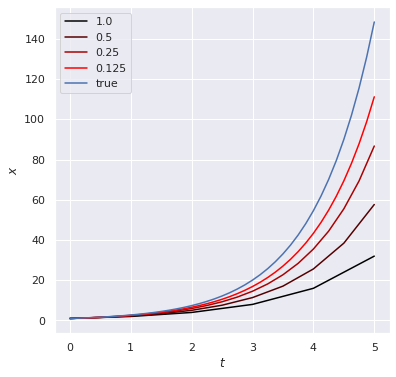

In [ ]:
def f(t, x): return a*x

a = 1
x0 = np.array([1])
T = 5
hs = [1.0, 0.5, 0.25, 0.125]

plt.figure(figsize=(6,6))
plt.xlabel('$t$')
plt.ylabel('$x$')

for i, h in enumerate(hs):
  t = np.arange(0,T+h,h)
  x = euler(f, x0, t)
  plt.plot(t, x, color=(i/3,0,0), label=h)

plt.plot(t, x0*np.exp(a*t), label='true')
plt.legend()
plt.show()

We see that the accuracy improves as the step size $h$ is decreased.

## Higher Order Numerical Methods

The Euler method is one of the simplest methods available, but not always the "best". There exist higher order methods which can improve numerical precision and stability, the most well known of which are RK4, Dopri. Their derivation mostly rely on similar derivations to the Euler method, but truncating Taylor at higher order terms.

Additionally, such methods may automatically determine the evaluation points $t_i$ and associated step sizes $h_i$ - the so-called "adaptive step methods" (now popular in deep learning applications).

The derivation of these methods will not be covered here. You may refer to [1]. Here, we simply show how such methods may be used by calling standard library functions in Python.

## Scipy

Conveniently, the `euler` template function provided above was the same as that of scipy's `solve_ivp`.





## Exercise 1.3 $-$ Using `solve_ivp`

Remake the plot of exercise 1.2, but include a curve for the following call:


```
from scipy.integrate import solve_ivp
solution = solve_ivp(f, [0,T], x0, t_eval=np.arange(0,T,1))
t = solution.t
x = solution.y
```

By default, `solve_ivp` (formerly `odeint`) will use RK45 and adaptive steps.

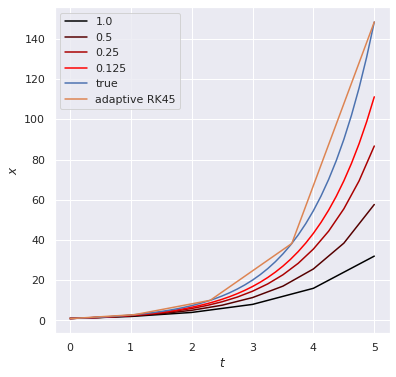

In [ ]:
def f(t, x):

  return a*x

a = 1
x0 = np.array([1])
T = 5
hs = [1.0, 0.5, 0.25, 0.125]

plt.figure(figsize=(6,6))
plt.xlabel('$t$')
plt.ylabel('$x$')

for i, h in enumerate(hs):
  t = np.arange(0,T+10**-6,h)
  x = euler(f, x0, t)
  plt.plot(t, x, color=(i/3,0,0), label=h)

plt.plot(t, x0*np.exp(a*t), label='true')

from scipy.integrate import solve_ivp
solution = solve_ivp(f, [0,T], x0)
plt.plot(solution.t, solution.y[0], label='adaptive RK45')

plt.legend()
plt.show()


As you can see, solve_ivp evaluates the function at fewer points (here, 5), and the error is much lower than with Euler.

# A More Complex ODE: Adding Input

Above we considered a very simple ODE in order to illustrate the key concepts. A slightly more complex version of the above ODE can be obtained by adding an "input" or drive that influences $x$:

\begin{aligned}
\frac{dx}{dt} = a x + b(t)
\end{aligned}

This ODE will crop up constantly throughout this course. It turns out that separation of variables doesn't work in this case (try it out and see!) However, another technique can be used called the [method of integrating factors](https://en.wikipedia.org/wiki/Integrating_factor). With this method, we multiply both sides of the ODE with some cleverly chosen function which allows a solution to be found. For the ODE above, we can write:

\begin{aligned}
&&e^{-at}\frac{dx}{dt} &= e^{-at} (a x + b(t))
\\ \implies&& \frac{d}{dt}\left( e^{-at} x\right) &= e^{-at} b(t) 
\\ \implies&& \int_0^t \frac{d}{d\tau}\left( e^{-a\tau} x(\tau)\right) d\tau &= \int_0^t e^{-a\tau} b(\tau) d\tau
\\ \implies&& e^{-at} x(t) - e^{-a \cdot 0} x(0) &= \int_0^t e^{-a\tau} b(\tau) d\tau
\\ \implies&& x(t) &= e^{at} x_0 + \int_0^t e^{a(t-\tau)} b(\tau) d\tau
\end{aligned}

In this case, we have an analytical solution involving an integral, and this integral cannot always be solved analytically. In such cases, rather than solving this integral numerically, we typically solve the ODE using the Euler method. 

##Exercise 2 $-$ Sinusoidal Control

As an exercise, try solving this ODE numerically (for example, try $b(t) = b_0 \sin (\omega t)$, with $a=-1$, $b_0 = 1$, $\omega = 10$, $x_0 = 0$, $t\in[0,5]$). In fact, this example can also be solved [analytically](https://www.wolframalpha.com/input?i=integrate%28e%5E%28a*%28t-y%29%29+*+sin%28b*y%29+dy%2C+y%3D0%2C+t%29).


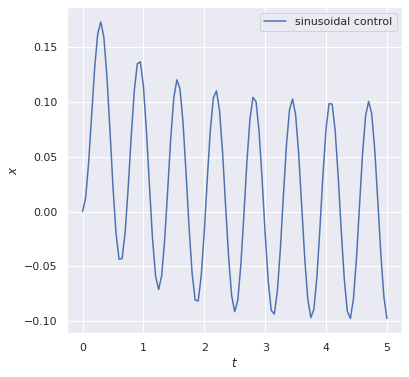

In [ ]:
## ODE with input

a = -1
b0 = 1
omega = 10
x0 = np.array([0])
T = 5

def f(t,x): return a*x + b0*np.sin(omega*t)

plt.figure(figsize=(6,6))
plt.xlabel('$t$')
plt.ylabel('$x$')

from scipy.integrate import solve_ivp
solution = solve_ivp(f, [0,T], x0, t_eval=np.linspace(0,T,101))
plt.plot(solution.t, solution.y[0], label='sinusoidal control')

plt.legend()
plt.show()


# Dynamical Systems

A dynamical system is a system whose state variables evolve in time according to a given rule (i.e., function). The examples we considered above were already dynamical systems, but we are now particularly interested in the case where there are multiple state variables (e.g., the activity of multiple neurons), so that $\mathbf{x}$ becomes a vector. In particular, we consider systems that can be written as

\begin{aligned}
\dot {\bf x}=f({\bf x}, t)
\end{aligned}
with ${\bf x}(t)\in \mathbb{R}^n$ and $\dot {\bf x} = \frac{d\mathbf{x}}{dt} $. 

If this vector notation feels unfamiliar to you, simply note that $\dot{x}_i = f(x_1,x_2,...,x_n,t)$ for $i\in [n]$, so that this is just a set of $n$ coupled ODEs, where each ODE acts as "input" to the other ones. 


## Linear Dynamical Systems

A very important class of dynamical systems in neuroscience is that of [linear dynamical systems](https://en.wikipedia.org/wiki/Linear_dynamical_system): 

\begin{aligned}
\dot {\bf x} = W{\bf x} + A \mathbf{u}(t)
\end{aligned}

with ${\bf u}\in \mathbb{R}^m$, with $W\in \mathbb{R}^{n \times n}$, $A\in \mathbb{R}^{n\times m}$.
This is the vector/matrix version of the ODE with input considered above, and the solution to this sytem can be derived in much the same way:
\begin{aligned}
\\{\bf x}(t) &= e^{Wt}{\bf x}_0 + \int_{0}^t e^{W(t-\tau)}A{\bf u}(\tau)d\tau
\end{aligned}
where the *matrix exponential* is defined as $e^{Wt}=\sum_{i=0}^\infty \frac{W^it^i}{i!}$ (in analogy to the usual exponential function for scalars $e^{at} = \sum_{i=0}^{\infty} \frac{a^it^i}{i!}$). 

The dynamics of ${\bf x}$ depends on the properties of the matrix $W$, such as its eigenvalues and eigenvectors, symmetry vs asymmetry/antisymmetry, etc. (see Useful Tricks section). There is a vibrant literature relating these different kinds of dynamics to the behaviour of neural circuits, and one could devote a whole course to this topic. We provide one example below, showing how antisymmetric $W$ (i.e. $W^T = -W$) leads to oscillations in the dynamics while symmetric $W$ (i.e. $W^T = W$) leads to so-called attractor dynamics in which activity quickly decays towards a fixed value.


# Exercise 3 $-$ Oscillatory vs Attractor Dynamics

To conclude, we now numerically solve and visualise a simple linear dynamical system. We consider how the properties of the weight matrix influence the resulting dynamics.

Implement the following dynamical system and evaluate it with `solve IVP`,

\begin{aligned}
\dot {\bf x} = W{\bf x}
\end{aligned}

where, ${\bf x}(t)\in \mathbb{R}^3$, ${\bf x}(0)=1$.

Generate the weight matrix as follows:

\begin{aligned}
W = \alpha_{symm}(B + B^T) + (1-\alpha_{symm})(B - B^T) - \alpha_{stable} I
\end{aligned}

where,
* $I$ is the identity matrix
* $B_{ij} \sim \mathcal{N}(0,1)$ is a random set of weights.

The parameter $\alpha_{symm}$ interpolates between a symmetric matrix ($\alpha_{symm}=1$) and an antisymmetric one ($\alpha_{symm}=0$). The parameter $\alpha_{stable}$ can be used to make the system more stable.

Tasks to complete:
1. Implement the correct `f` for this system.
2. Numerically evaluate the system with scipy's function on $t\in [0,10]$.
3. Plot the resulting dynamics in a 3D space using matplotlib.
4. Try varying each $\alpha$ and see how it influences the solution.


Comment on what you observe - how do the two parameters influence the dynamics?

Note: Since we are now dealing with random variables, it is important to *seed* our evaluations. You can do this by including the code `np.random.seed(1)`. You can also test the effect of varying the random seed on the solution.

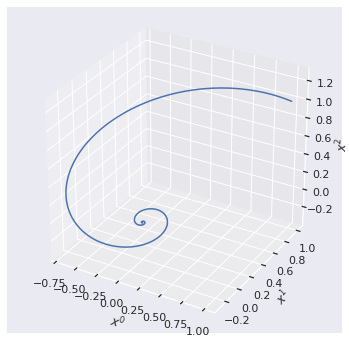

In [ ]:
#solution
np.random.seed(1)

n = 3
T = 10
alpha_symm = 0;
alpha_stable = 1

B = np.random.randn(n,n)
W = alpha_symm * (B + B.transpose()) + (1-alpha_symm) * (B - B.transpose()) - alpha_stable*np.eye(n)
x0 = np.ones(n)

def f(t, x): return (W @ x)

from scipy.integrate import solve_ivp
solution = solve_ivp(f, [0,T], x0, t_eval=np.linspace(0,T,1001))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

x = solution.y.transpose()

ax.plot(x[:,0], x[:,1], x[:,2])

ax.set_xlabel('$x^0$')
ax.set_ylabel('$x^1$')
ax.set_zlabel('$x^2$')
plt.show()

# Some Useful Tricks

## Transformation to an Autonomous System
When $f$ does not depend on $t$, we call the system *autonomous*. A non-autonomous dynamical system of the form,
\begin{aligned}
\dot {\bf x} = f({\bf x}, t)
\end{aligned}
can be rewritten as an autonomous one by adding a variable to the system, 
\begin{aligned}
\begin{cases}
\dot {\bf x} = f({\bf x}, y)
\\\dot y = 1
\end{cases} 
\end{aligned}
and $y(0)=0$ so that $y(t)=t$.

## Lowering the Order
A second order dynamical system of the form,
\begin{aligned}
\ddot {\bf x} = f({\bf x}, \dot {\bf x})
\end{aligned}
can be rewritten as a first order one by again adding variables to the system. Let ${\bf y}=\dot {\bf x}$, then $\dot {\bf y} = \ddot {\bf x}$, thus,
\begin{aligned}
\begin{cases}
\dot {\bf x} = {\bf y}
\\\dot {\bf y} = f({\bf x}, \dot {\bf x})
\end{cases} 
\end{aligned}
A similar strategy can be applied to higher order systems. 

## Solution of Linear Dynamical System via Eigenvalues/Eigenvectors

It turns out the the equation $\dot{\mathbf{x}} = W\mathbf{x} + A \mathbf{u}(t)$ can be simplified by writing it in terms of the eigenvectors of $W$. In particular, for symmetric (and indeed, antisymmetric) $W$, the solution is $$\mathbf{x}(t) = \sum_k e^{\lambda_k t} (\mathbf{v}_k \cdot A\mathbf{u}_0) + \sum_k \int_0^t e^{\lambda_k (t-\tau)} (\mathbf{v}_k \cdot A\mathbf{u}(\tau)) \mathbf{v}_k d\tau$$, where $W \mathbf{v}_k = \lambda_k \mathbf{v}_k$ (i.e., $\mathbf{v}_k, \lambda_k$ are the eigenvectors and eigenvalues of $W$). Moreover, the solution projected along any eigenvector is $$\mathbf{v}_k \cdot \mathbf{x}(t) =e^{\lambda_k t} (\mathbf{v}_k \cdot A\mathbf{u}_0) + \int_0^t e^{\lambda_k (t-\tau)} (\mathbf{v}_k \cdot A\mathbf{u}(\tau)) d\tau$$, so that the variables $\mathbf{v}_k \cdot \mathbf{x}(t)$ follow the same solution as for the scalar case. 

In other words, for symmetric (or antisymmetric) $W$, the solution decouples along each eigenvector, giving a set of $n$ independent scalar ODEs. If an eigenvalue $\lambda_k$ has positive real part, the term $e^{\lambda_k t} (\mathbf{v}_k \cdot A\mathbf{u}_0)$ will grow to infinity, and the system is therefore unstable. If all eigenvalues have negative real part, this term will decay to zero, and the system is stable. 

The more general case of asymmetric $W$ is more complicated, but can be solved in a similar way (and indeed, the relationship between eigenvalues and stability still holds).

# References
Burden, R. L., Faires, J. D., & Burden, A. M. (2015). Numerical analysis.